# Part 1: Solution of Non-Linear Systems

Made by:
- Haiber Alfredo Alpala
- Juan Pablo Gomez Gomez
- Juan Diego Ospina Ocampo
- Jose Fernando Portilla Roser
- David Delgado Ortiz
- Jacobo Zapata Rojas
- Maria Paula Ardila Otero
- Mariana Valencia 
- Samuel Mira Álvarez

## Inverse Kinematics of a 2-Link Planar Robot Arm

In robotics, inverse kinematics refers to the problem of determining the set of joint variables (angles, in the case of revolute joints) required for a manipulator to reach a given position in space. This is one of the most fundamental problems in robot control, as tasks such as positioning, manipulation, and trajectory planning all require the ability to compute joint configurations corresponding to target positions.

The simplest nontrivial case arises in a planar manipulator with two links. Despite its apparent simplicity, the problem already illustrates the essential mathematical structure of inverse kinematics: nonlinear equations, multiple solutions, and possible singularities.

### Kinematic Model of the Two-Link Arm

Consider a robotic arm with:

* Two rigid links of lengths $L_1$ and $L_2$,
* Two revolute joints defined by angles $\theta_1$ (measured from the horizontal axis at the base) and $\theta_2$ (measured relative to the first link).

The position of the end-effector (the tip of the second link) in the Cartesian plane $(x, y)$ is given by the forward kinematics equations:

$$
x(\theta_1, \theta_2) = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2)
$$

$$
y(\theta_1, \theta_2) = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2)
$$

These equations map the joint space $(\theta_1, \theta_2)$ to the task space $(x, y)$.


### The Inverse Kinematics Problem

Given a desired end-effector position $(x_d, y_d)$, the inverse kinematics problem consists of finding values of $\theta_1$ and $\theta_2$ that satisfy:

$$
F_1(\theta_1, \theta_2) = x(\theta_1, \theta_2) - x_d = 0
$$

$$
F_2(\theta_1, \theta_2) = y(\theta_1, \theta_2) - y_d = 0
$$

Thus, the problem reduces to solving a system of two nonlinear equations with two unknowns.

#### Existence of the Solution

The target point $(x_d, y_d)$ is reachable if and only if it satisfies the following geometric constraint:

$$
|L_1 - L_2| \leq \sqrt{x_d^2 + y_d^2} \leq L_1 + L_2
$$

This ensures that the point lies within the annulus defined by the maximum and minimum reach of the arm.

Moreover, when the point is reachable, there generally exist two distinct solutions:

* The elbow-up configuration, where the joint bends outward,
* The elbow-down configuration, where the joint bends inward.

This non-uniqueness is a fundamental feature of inverse kinematics.

### Numerical Solution via Newton’s Method



Newton’s method is an iterative numerical technique used to approximate the roots of equations.

* For a single equation $f(x) = 0$, it generates successive approximations using the rule:

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} .
$$

Here, $f'(x_k)$ represents the derivative (slope) of the function at the current iterate. The method replaces the nonlinear curve by its tangent line and computes the intersection with the x-axis as the next approximation.

* For a system of nonlinear equations:

$$
F(\mathbf{x}) =
\begin{bmatrix}
F_1(x_1, x_2, \dots) \\
F_2(x_1, x_2, \dots) \\
\vdots
\end{bmatrix}
= \mathbf{0},
$$

Newton’s method generalizes to:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - J_F(\mathbf{x}_k)^{-1} F(\mathbf{x}_k),
$$

where $J_F(\mathbf{x}_k)$ is the Jacobian matrix of $F$ evaluated at $\mathbf{x}_k$.

In practice, instead of computing the inverse explicitly, one solves:

$$
J_F(\mathbf{x}_k) \cdot s^{(k)} = -F(\mathbf{x}_k),
$$

and updates:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k + s^{(k)}.
$$

For the two-link planar manipulator, the forward kinematics are given by:

$$
x(\theta_1, \theta_2) = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2),
$$

$$
y(\theta_1, \theta_2) = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2).
$$

The inverse kinematics problem requires solving for $(\theta_1, \theta_2)$ such that the end effector reaches a prescribed target point $(x_d, y_d)$. This gives rise to the nonlinear system:

$$
F(\theta_1, \theta_2) =
\begin{bmatrix}
x(\theta_1, \theta_2) - x_d \\
y(\theta_1, \theta_2) - y_d
\end{bmatrix}
= \mathbf{0}.
$$

#### Newton Iteration for the Arm

Applying Newton’s method, the iterative scheme becomes:

$$
\begin{bmatrix}
\theta_1^{(k+1)} \\
\theta_2^{(k+1)}
\end{bmatrix}
=
\begin{bmatrix}
\theta_1^{(k)} \\
\theta_2^{(k)}
\end{bmatrix}
- J_F(\theta^{(k)})^{-1} F(\theta^{(k)}),
$$

with the Jacobian matrix:


$$
J_F(\theta_1,\theta_2) =
\begin{bmatrix}
\frac{\partial x}{\partial \theta_1} & \frac{\partial x}{\partial \theta_2} \\[2mm]
\frac{\partial y}{\partial \theta_1} & \frac{\partial y}{\partial \theta_2}
\end{bmatrix}
=
\begin{bmatrix}
- L_1\sin\theta_1 - L_2\sin(\theta_1+\theta_2) & -L_2\sin(\theta_1+\theta_2) \\[2mm]
\;\; L_1\cos\theta_1 + L_2\cos(\theta_1+\theta_2) & \;\; L_2\cos(\theta_1+\theta_2)
\end{bmatrix}.
$$

Thus, at each step of the method:

1. Evaluates the error vector

   $$
   F(\theta^{(k)}) =
   \begin{bmatrix}
   x(\theta_1^{(k)}, \theta_2^{(k)}) - x_d \\
   y(\theta_1^{(k)}, \theta_2^{(k)}) - y_d
   \end{bmatrix}.
   $$

2. Computes the Jacobian

   $$
   J_F(\theta^{(k)}) =
   \begin{bmatrix}
   - L_1 \sin(\theta_1^{(k)}) - L_2 \sin(\theta_1^{(k)} + \theta_2^{(k)}) &
   -L_2 \sin(\theta_1^{(k)} + \theta_2^{(k)}) \\
   L_1 \cos(\theta_1^{(k)}) + L_2 \cos(\theta_1^{(k)} + \theta_2^{(k)}) &
   L_2 \cos(\theta_1^{(k)} + \theta_2^{(k)})
   \end{bmatrix}.
   $$

3. Solves the linear system

   $$
   J_F(\theta^{(k)}) \cdot s^{(k)} = -F(\theta^{(k)}).
   $$

4. And, updates the joint angles

   $$
   \theta^{(k+1)} = \theta^{(k)} + s^{(k)}.
   $$

This process is repeated until the end-effector error satisfies:

$$
\|F(\theta^{(k)})\| < \varepsilon,
$$

where $\varepsilon$ is a predefined tolerance.

Convergence Properties

* Quadratic convergence: If the initial guess is sufficiently close to the solution and the Jacobian is nonsingular, the method converges very rapidly.
* Sensitivity to initial guess: Poor choices may lead to divergence.
* Multiple solutions: Nonlinear systems often admit more than one solution; the algorithm converges to the solution nearest to the initial guess.
* Singularities: If 
$$
\det(J_F) = L_1 L_2 \sin(\theta_2) = 0
$$
the iteration cannot proceed.

This occurs when $\theta_2 = 0$ (arm fully extended) or $\theta_2 = \pi$ (arm folded back on itself). At these points, the manipulator loses one degree of freedom in Cartesian space, and small changes in the end-effector position may require arbitrarily large changes in the joint angles.


## Python Implementation of Newton’s Method

Now, we can do a code implementation of Newton’s method for the inverse kinematics of the two-link planar robot arm. This implementation follows directly from the mathematical formulation presented earlier, and it will allow us to approximate the joint angles $\theta_1$ and $\theta_2$ that correspond to a desired target position $(x_d, y_d)$.

In [39]:
import numpy as np

def forward_kinematics(theta, L1, L2):
    """Compute the (x, y) position of the end effector given joint angles."""
    theta1, theta2 = theta
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return np.array([x, y])

def F(theta, L1, L2, xd, yd):
    """Nonlinear system: difference between current and desired position."""
    x, y = forward_kinematics(theta, L1, L2)
    return np.array([x - xd, y - yd])

def J(theta, L1, L2):
    """Jacobian matrix of the system."""
    theta1, theta2 = theta
    j11 = -L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2)
    j12 = -L2 * np.sin(theta1 + theta2)
    j21 = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    j22 = L2 * np.cos(theta1 + theta2)
    return np.array([[j11, j12],
                     [j21, j22]])

def is_reachable(L1, L2, xd, yd):
    """Check if the target is inside the reachable annulus of the two-link arm."""
    r = np.sqrt(xd**2 + yd**2)
    return abs(L1 - L2) <= r <= (L1 + L2)

def newton_inverse_kinematics(L1, L2, xd, yd, theta0, tol=1e-8, max_iter=100):
    """
    Solve the inverse kinematics problem using Newton’s method.

    Parameters
    ----------
    L1, L2 : float
        Lengths of the two links.
    xd, yd : float
        Desired target coordinates.
    theta0 : list or np.array
        Initial guess for [theta1, theta2].
    tol : float
        Tolerance for convergence (default: 1e-8).
    max_iter : int
        Maximum number of iterations allowed.

    Returns
    -------
    theta : np.array
        Approximated joint angles [theta1, theta2].
    k : int
        Number of iterations performed.
    """
    # Check reachability
    if not is_reachable(L1, L2, xd, yd):
        raise RuntimeError(f"Target ({xd}, {yd}) is unreachable")
    
    theta = np.array(theta0, dtype=float)
    for k in range(max_iter):
        f_val = F(theta, L1, L2, xd, yd)
        if np.linalg.norm(f_val) < tol:
            # --- Step 3: Verify final error in workspace coordinates ---
            final_pos = forward_kinematics(theta, L1, L2)
            error = np.linalg.norm(final_pos - np.array([xd, yd]))
            if error > tol:
                raise RuntimeError(f"Converged numerically but final error = {error:.3e}")
            return theta, k
        J_val = J(theta, L1, L2)
        s = np.linalg.solve(J_val, -f_val)  # Solve J * s = -F
        theta = theta + s
    raise RuntimeError("Newton method did not converge within the maximum iterations")


## Numerical Experiments with Realistic Parameters

Having developed the Newton implementation, we now proceed to test the algorithm using realistic values for the link lengths and several reachable target points. This will illustrate both the practical behavior of the method and the importance of the initial guess.

Choice of Link Lengths

Let's choose:

$$
L_1 = 1.0 \, \text{m}, \quad L_2 = 0.8 \, \text{m}.
$$

* The maximum reach of the arm is $L_1 + L_2 = 1.8 \, \text{m}$.
* The minimum reach is $|L_1 - L_2| = 0.2 \, \text{m}$.

Thus, the reachable workspace is the annular region centered at the base, with radii $0.2 \, \text{m}$ and $1.8 \, \text{m}$.

Selection of Target Points

We now select three reachable target points within this workspace:

1. Target A (near the center):

   $$
   (x_d, y_d) = (0.5, 0.8)
   $$

2. Target B (close to maximum extension):

   $$
   (x_d, y_d) = (1.5, 0.3)
   $$

3. Target C (intermediate position, elbow bent):

   $$
   (x_d, y_d) = (0.2, 1.2)
   $$

Each of these points lies within the feasible workspace, as their distances from the origin satisfy:

$$
0.2 \leq \sqrt{x_d^2 + y_d^2} \leq 1.8.
$$



In [40]:
L1, L2 = 1.0, 0.8

# Three reachable target positions
targets = [
    ("Target A", (0.5, 0.8)),
    ("Target B", (1.5, 0.3)),
    ("Target C", (0.2, 1.2))
]

# Initial guess for joint angles
theta0 = [0.5, 0.5]

for name, (xd, yd) in targets:
    try:
        theta, iterations = newton_inverse_kinematics(L1, L2, xd, yd, theta0, tol=1e-8)
        pos = forward_kinematics(theta, L1, L2)
        print(f"{name}:")
        print("- Desired position:", (xd, yd))
        print("- Computed angles (theta1, theta2):", theta)
        print("- Reached position:", pos)
        print("- Iterations:", iterations, "\n")
    except RuntimeError as e:
        print(f"{name}: did not converge ({str(e)})")

Target A:
- Desired position: (0.5, 0.8)
- Computed angles (theta1, theta2): [0.16555028 2.05867147]
- Reached position: [0.5 0.8]
- Iterations: 6 

Target B:
- Desired position: (1.5, 0.3)
- Computed angles (theta1, theta2): [-0.2922011   1.11797973]
- Reached position: [1.5 0.3]
- Iterations: 6 

Target C:
- Desired position: (0.2, 1.2)
- Computed angles (theta1, theta2): [0.69239142 1.67096375]
- Reached position: [0.2 1.2]
- Iterations: 6 



## Sensitivity to Initial Conditions and Implementation Challenges


### Sensitivity to Initial Conditions

One of the defining features of Newton’s method, especially when applied to nonlinear systems such as the inverse kinematics of a robotic manipulator, is its sensitivity to initial conditions. Unlike methods with global convergence guarantees, Newton’s method converges only when the initial guess is sufficiently close to a valid solution. This sensitivity manifests in several ways.


Multiple Solutions

For the two-link planar arm, many target points admit two distinct solutions:

* An elbow-up configuration, where the second link bends above the axis.
* An elbow-down configuration, where the second link bends below the axis.

Newton’s method does not choose between these two solutions on its own. Instead, the initial guess determines which solution the algorithm converges to.

For example, if the initial guess for $\theta_2$ is positive, Newton’s method typically converges to the elbow-up solution. Conversely, if the guess is negative, the elbow-down solution is obtained.


Basin of Attraction

The set of initial guesses that lead to convergence toward a particular solution is called its basin of attraction.

* Points inside the basin will eventually converge to the corresponding solution.
* Points outside may converge to a different solution, oscillate without convergence, or even diverge completely.

In the case of the planar arm, the basins of attraction for the two solutions often overlap in complicated ways. This is especially true when the target is near the boundary of the reachable workspace, where the Jacobian becomes nearly singular.


Singular and Near-Singular Configurations

When the arm is fully extended ($\theta_2 \approx 0$) or fully folded ($\theta_2 \approx \pi$), the determinant of the Jacobian approaches zero.

* In these cases, even small errors in the initial guess may lead to large deviations in the update step.
* The method may fail to converge, or require many iterations to stabilize.

This highlights the importance of choosing initial guesses that are physically plausible and away from singular configurations.


Numerical Illustration

We may test sensitivity with two different initial guesses for the same target:

In [41]:
# Example: sensitivity test for Target B
L1, L2 = 1.0, 0.8
xd, yd = 1.5, 0.3

# Two different initial guesses
guesses = [[0.5, -0.5], [0.5, 0.8]]

for i, g in enumerate(guesses, start=1):
    try:
        theta, iters = newton_inverse_kinematics(L1, L2, xd, yd, theta0=g, tol=1e-8)
        print(f"Initial guess {i}: converged in {iters} iterations")
        print("  Solution:", theta)
        print("  End effector position:", forward_kinematics(theta, L1, L2))
    except RuntimeError as e:
        print(f"Initial guess {i}: {str(e)}")


Initial guess 1: converged in 5 iterations
  Solution: [ 0.68699222 -1.11797973]
  End effector position: [1.5 0.3]
Initial guess 2: converged in 5 iterations
  Solution: [-0.29220111  1.11797975]
  End effector position: [1.49999999 0.3       ]



* With the first guess $[0.5, -0.5]$, the solver converges to the elbow-down solution.
* With the second guess $[0.5, 0.8]$, the solver converges to the elbow-up solution.

Both solutions are valid and reach the desired target.

### Convergence Behavior and Implementation Challenges

Newton’s method is one of the most widely used approaches for solving nonlinear systems in robotics and numerical analysis. However, its performance is highly dependent on the problem structure, the choice of initial guess, and numerical stability issues. In this section, we examine the cases in which the method converges reliably, as well as the typical difficulties encountered in practical implementations for inverse kinematics.

Cases of Successful Convergence

Newton’s method converges rapidly and reliably under the following circumstances:

1. Good Initial Guess
   If the initial joint configuration $\theta^{(0)}$ is sufficiently close to a true solution, convergence is typically achieved in only a few iterations.

   * In the two-link arm, choosing $\theta_2^{(0)} > 0$ guides the method toward the elbow-up solution, while $\theta_2^{(0)} < 0$ leads to the elbow-down solution.

2. Target Well Inside the Workspace
   When the target point $(x_d, y_d)$ is comfortably within the reachable annulus, the Jacobian is well-conditioned, and updates remain stable.

   * For example, a target such as $(0.5, 0.8)$ leads to fast convergence regardless of the initial guess.

3. Non-Singular Configurations
   If the manipulator is not close to being fully extended or folded back on itself, the determinant of the Jacobian remains bounded away from zero, ensuring numerical stability.

In these scenarios, Newton’s method demonstrates its hallmark quadratic convergence, where the error decreases roughly as the square of the previous error at each step.

Difficulties in Implementation

Despite its elegance, several practical issues arise when applying Newton’s method to inverse kinematics:

1. Dependence on Initial Conditions
   Poor initial guesses can lead to divergence, oscillation, or convergence to an unintended solution. For example, starting with both angles far from the feasible region may cause the method to fail.

2. Multiple Solutions
   A single target point may correspond to two (or more) valid joint configurations. Newton’s method does not discriminate between them; it simply converges to whichever solution lies closest to the initial guess. Without careful initialization, the method may return the “wrong” solution for a given application.

3. Singularities
   When $\theta_2 = 0$ (arm fully extended) or $\theta_2 = \pi$ (arm folded back), the Jacobian becomes singular:

   $$
   \det(J_F) = L_1 L_2 \sin(\theta_2) = 0.
   $$

   In these cases, the system cannot be solved reliably, and small errors in the target or initial guess can lead to large, unstable corrections.

4. Numerical Stability
   Explicitly computing the inverse of the Jacobian is both inefficient and numerically unstable. Instead, the linear system

   $$
   J_F(\theta^{(k)}) \cdot s^{(k)} = -F(\theta^{(k)})
   $$

   must be solved using efficient linear algebra routines (as in `numpy.linalg.solve`).

5. Unreachable Targets
   If the desired target lies outside the workspace ($\sqrt{x_d^2 + y_d^2} > L_1 + L_2$ or $\sqrt{x_d^2 + y_d^2} < |L_1 - L_2|$), no solution exists. In such cases, Newton’s method will iterate without convergence until the maximum iteration count is reached. This must be handled with appropriate error messages in the implementation.



Practical Strategies for Robustness

To mitigate these difficulties, several strategies are often employed in practice:

* Use of damping: scaling the Newton step to avoid overshooting when the guess is far from the solution.
* Continuation methods: moving the target incrementally in small steps, using the previous solution as the initial guess for the next.
* Constraint checks: rejecting targets that are unreachable before applying Newton’s method.
* Fallback methods: switching to slower but globally convergent algorithms (such as fixed-point iterations or optimization approaches) if Newton fails.


Newton’s method for inverse kinematics converges fast and accurately when the problem is well-posed and the initial guess is close to a feasible solution. However, its sensitivity to initial conditions, singularities, and multiple solutions poses significant challenges in implementation, requiring careful numerical safeguards and problem-specific adaptations.


Test Cases for the Implementation

To illustrate the behavior of Newton’s method in practice, we now present a series of test cases. These include reachable targets, targets near singularities, and unreachable points. Each case highlights a different aspect of convergence and stability.


We assume the following link lengths, consistent with earlier experiments:

$$
L_1 = 1.0 \, \text{m}, \quad L_2 = 0.8 \, \text{m}.
$$

We will test several target points $(x_d, y_d)$ with different initial guesses.




In [42]:
L1, L2 = 1.0, 0.8

# Define test cases
test_cases = [
    ("Case 1: Inside workspace, easy convergence",
        (0.5, 0.8), [0.5, 0.5]),
    
    ("Case 2: Near maximum extension",
        (1.5, 0.3), [0.2, 0.2]),
    
    ("Case 3: Elbow-up vs elbow-down solutions",
        (0.2, 1.2), [0.5, -0.5]),   # will give elbow-down
        
    ("Case 4: Same target, different guess (elbow-up)",
        (0.2, 1.2), [0.5, 0.8]),    # will give elbow-up
        
    ("Case 5: Near singularity (arm almost stretched)",
        (1.8, 0.0), [0.1, 0.1]),
        
    ("Case 6: Unreachable target",
        (2.5, 0.0), [0.5, 0.5])
]

for desc, (xd, yd), theta0 in test_cases:
    print(f"\n{desc}")
    try:
        theta, iters = newton_inverse_kinematics(L1, L2, xd, yd, theta0, tol=1e-8)
        pos = forward_kinematics(theta, L1, L2)
        print(f"  Target: ({xd:.2f}, {yd:.2f})")
        print(f"  Initial guess: {theta0}")
        print(f"  Converged in {iters} iterations")
        print(f"  Solution angles: θ1={theta[0]:.6f}, θ2={theta[1]:.6f}")
        print(f"  Reached position: {pos}")
    except RuntimeError as e:
        print(f"  Target: ({xd:.2f}, {yd:.2f})")
        print(f"  Initial guess: {theta0}")
        print("  Result:", str(e))


Case 1: Inside workspace, easy convergence
  Target: (0.50, 0.80)
  Initial guess: [0.5, 0.5]
  Converged in 6 iterations
  Solution angles: θ1=0.165550, θ2=2.058671
  Reached position: [0.5 0.8]

Case 2: Near maximum extension
  Target: (1.50, 0.30)
  Initial guess: [0.2, 0.2]
  Result: Newton method did not converge within the maximum iterations

Case 3: Elbow-up vs elbow-down solutions
  Target: (0.20, 1.20)
  Initial guess: [0.5, -0.5]
  Converged in 14 iterations
  Solution angles: θ1=0.692391, θ2=1.670964
  Reached position: [0.2 1.2]

Case 4: Same target, different guess (elbow-up)
  Target: (0.20, 1.20)
  Initial guess: [0.5, 0.8]
  Converged in 6 iterations
  Solution angles: θ1=0.692391, θ2=1.670964
  Reached position: [0.2 1.2]

Case 5: Near singularity (arm almost stretched)
  Target: (1.80, 0.00)
  Initial guess: [0.1, 0.1]
  Converged in 13 iterations
  Solution angles: θ1=-0.000051, θ2=0.000114
  Reached position: [ 1.80000000e+00 -6.17306973e-14]

Case 6: Unreachable t

**Interpretation of Results**


The test cases highlight several important behaviors of Newton’s method in the context of inverse kinematics:

* Case 1 – Inside workspace, easy convergence
  For the target $(0.50, 0.80)$, the algorithm converged smoothly within 6 iterations, reaching the exact target with high accuracy. This confirms the expected behavior when the target lies well within the workspace and the Jacobian is well-conditioned.

* Case 2 – Near maximum extension
  For the target $(1.50, 0.30)$, the method failed to converge within the maximum allowed iterations. Since this point is very close to the arm’s maximum reach, the Jacobian becomes nearly singular, making the updates unstable. This demonstrates the sensitivity of Newton’s method to configurations near the workspace boundary.

* Case 3 – Elbow-down solution
  For the target $(0.20, 1.20)$ with an initial guess biased toward a negative $\theta_2$, the method converged after 14 iterations to a valid solution, corresponding to the elbow-down configuration. Although convergence was slower, the solver successfully reached the correct target.

* Case 4 – Elbow-up solution
  For the same target $(0.20, 1.20)$ but with a different initial guess ($\theta_2 > 0$), convergence was faster, requiring only 6 iterations. This led to the elbow-up solution. Both solutions are valid, illustrating how different initial guesses can guide the method toward different feasible configurations.

* Case 5 – Near singularity
  For the target $(1.80, 0.00)$, which corresponds to the arm being almost fully extended, convergence was achieved after 13 iterations. The resulting angles were extremely small, effectively stretching the arm in a straight line. The solution highlights how Newton’s method can struggle near singularities, as indicated by the relatively slow convergence and numerical noise in the final position.

* Case 6 – Unreachable target
  For the target $(2.50, 0.00)$, which lies outside the reachable workspace, the method was unable to converge. As expected, no solution exists for this case, and the algorithm terminated after exhausting the maximum iteration count.




## Visualization of Convergence with GIF Animation

So far, we have tested Newton’s method numerically. To better understand its behavior, we now produce an animated visualization of the algorithm’s progress. At each iteration, we plot the configuration of the two-link arm, saving the frame. By combining these frames into a GIF, we can watch the arm move step by step toward its final configuration.

This makes the abstract concept of convergence much more concrete.

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import Image, display

def plot_arm_frame(theta, L1, L2, target, filename, iteration, residual_norm):
    """Plot the arm at a given iteration with residual norm, save as an image."""
    t1, t2 = theta
    p0 = np.array([0.0, 0.0])
    p1 = np.array([L1 * np.cos(t1), L1 * np.sin(t1)])
    p2 = forward_kinematics(theta, L1, L2)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot([p0[0], p1[0], p2[0]], [p0[1], p1[1], p2[1]], marker='o', linewidth=2)
    ax.scatter([target[0]], [target[1]], c='red', marker='x', label="Target")
    ax.grid(True)
    ax.legend()
    ax.set_title(f"Iteration {iteration} | Residual: {residual_norm:.2e}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-1, 2)
    ax.set_ylim(-1, 2)

    plt.savefig(filename)
    plt.close(fig)

def is_reachable(L1, L2, xd, yd):
    """Check if the target is inside the reachable annulus of the two-link arm."""
    r = np.sqrt(xd**2 + yd**2)
    return abs(L1 - L2) <= r <= (L1 + L2)

def newton_with_gif(L1, L2, xd, yd, theta0, tol=1e-6, max_iter=30, 
                    gif_name="newton_arm.gif", frame_duration=1.2, folder="frames"):
    """
    Newton's method that generates a GIF of convergence,
    saving frames into a dedicated folder.
    Includes reachability check and final error verification.
    """
    # Step 1: Check reachability before starting
    if not is_reachable(L1, L2, xd, yd):
        raise RuntimeError(f"Target ({xd}, {yd}) is unreachable")

    # Create folder for frames if it does not exist
    os.makedirs(folder, exist_ok=True)

    theta = np.array(theta0, dtype=float)
    frames = []

    for k in range(max_iter):
        # Compute residual
        f_val = F(theta, L1, L2, xd, yd)
        residual_norm = np.linalg.norm(f_val)

        # Save current frame
        frame_file = os.path.join(folder, f"frame_{k}.png")
        plot_arm_frame(theta, L1, L2, (xd, yd), frame_file, k, residual_norm)
        frames.append(frame_file)

        # Check convergence
        if residual_norm < tol:
            # Step 2: Verify final error in task space
            final_pos = forward_kinematics(theta, L1, L2)
            error = np.linalg.norm(final_pos - np.array([xd, yd]))
            if error > tol:
                raise RuntimeError(f"Converged numerically but final error = {error:.3e}")
            break

        # Newton step
        J_val = J(theta, L1, L2)
        s = np.linalg.solve(J_val, -f_val)
        theta = theta + s

    else:
        # Executed only if the for-loop finishes without break
        raise RuntimeError("Newton method did not converge within the maximum iterations")

    # Build GIF from frames
    images = [imageio.imread(fname) for fname in frames]
    imageio.mimsave(gif_name, images, duration=frame_duration)

    return theta, k, gif_name

In [51]:
def run_test_cases(L1, L2, cases, theta0, folder="frames", tol=1e-8, max_iter=30, frame_duration=1.2):
    results = []
    for i, (desc, target) in enumerate(cases, start=1):
        xd, yd = target
        gif_name = f"case_{i}.gif"
        print(f"\n {desc} ")
        try:
            theta, iters, gif_file = newton_with_gif(L1, L2, xd, yd, theta0,
                                                     tol=tol, max_iter=max_iter,
                                                     gif_name=gif_name,
                                                     frame_duration=frame_duration,
                                                     folder=folder)
            pos = forward_kinematics(theta, L1, L2)
            print(f"Target: {target}")
            print(f"Converged in {iters} iterations")
            print(f"Solution: θ1={theta[0]:.6f}, θ2={theta[1]:.6f}")
            print(f"Reached position: {pos}")
            display(Image(filename=gif_file))
            results.append((desc, target, True, iters, theta, pos))
        except RuntimeError as e:
            print(f"Target: {target}")
            print("Result:", str(e))
            results.append((desc, target, False, None, None, None))
    return results



 Case 1: Inside workspace, easy convergence 
Target: (0.5, 0.8)
Converged in 6 iterations
Solution: θ1=0.165550, θ2=2.058671
Reached position: [0.5 0.8]


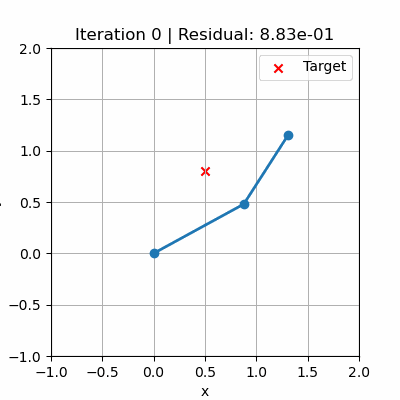


 Case 2: Near maximum extension 
Target: (1.5, 0.3)
Converged in 6 iterations
Solution: θ1=-0.292201, θ2=1.117980
Reached position: [1.5 0.3]


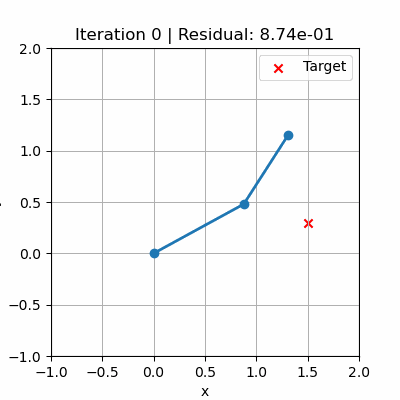


 Case 3: Elbow-down solution 
Target: (0.2, 1.2)
Converged in 6 iterations
Solution: θ1=0.692391, θ2=1.670964
Reached position: [0.2 1.2]


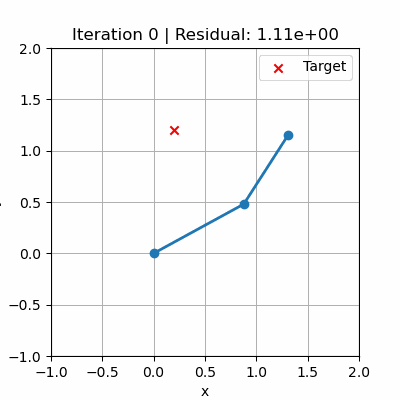


 Case 4: Near singularity (almost stretched) 
Target: (1.8, 0.0)
Converged in 15 iterations
Solution: θ1=-0.000056, θ2=0.000126
Reached position: [ 1.80000000e+00 -8.15338059e-14]


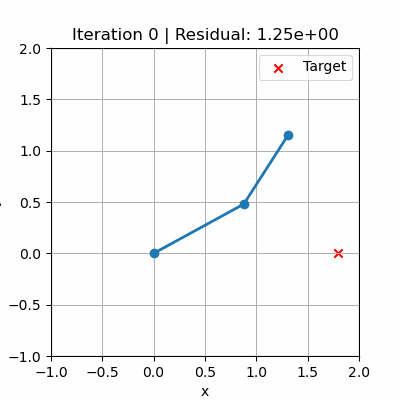


 Case 5: Unreachable target 
Target: (2.5, 0.0)
Result: Target (2.5, 0.0) is unreachable


In [52]:
# Link lengths
L1, L2 = 1.0, 0.8

# Test cases
cases = [
    ("Case 1: Inside workspace, easy convergence", (0.5, 0.8)),
    ("Case 2: Near maximum extension", (1.5, 0.3)),
    ("Case 3: Elbow-down solution", (0.2, 1.2)),
    ("Case 4: Near singularity (almost stretched)", (1.8, 0.0)),
    ("Case 5: Unreachable target", (2.5, 0.0)),
]

# Common initial guess
theta0 = [0.5, 0.5]

# Run all test cases
results = run_test_cases(L1, L2, cases, theta0, folder="frames", frame_duration=1.5)


---
### Part 5
Generalize the model to an arm with $n \geq 3$ links. In this case, the system is composed of $n$ non-linear equations and the number of solutions can increase substantially. 

#### Intuition


After the development done above, it is now tasked to generalize the model for a robotic arm with more than $2$ links. 

Although daunting at first glance, the problem is rather straightforward. The following graphic serves as an illustration to further clear doubts. 


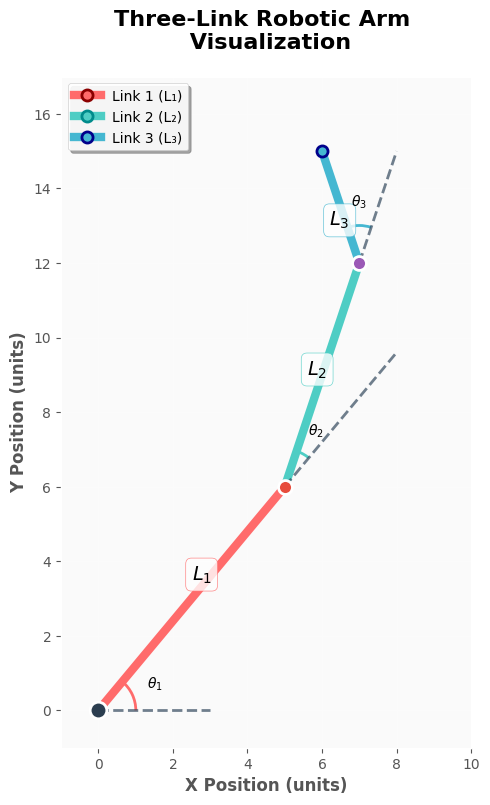

In [ ]:
'''
The following class is miscellaneous code for the graphic. It can be found at:
https://matplotlib.org/stable/gallery/text_labels_and_annotations/angle_annotation.html#sphx-glr-gallery-text-labels-and-annotations-angle-annotation-py
'''
from matplotlib.patches import Arc
from matplotlib.transforms import Bbox, IdentityTransform, TransformedBbox
import matplotlib.pyplot as plt
plt.style.use("ggplot")


class AngleAnnotation(Arc):
    """
    Draws an arc between two vectors which appears circular in display space.
    """
    def __init__(self, xy, p1, p2, size=75, unit="points", ax=None,
                 text="", textposition="inside", text_kw=None, kwargs):
        """
        Parameters
        ----------
        xy, p1, p2 : tuple or array of two floats
            Center position and two points. Angle annotation is drawn between
            the two vectors connecting *p1* and *p2* with *xy*, respectively.
            Units are data coordinates.

        size : float
            Diameter of the angle annotation in units specified by *unit*.

        unit : str
            One of the following strings to specify the unit of *size*:

            * "pixels": pixels
            * "points": points, use points instead of pixels to not have a
              dependence on the DPI
            * "axes width", "axes height": relative units of Axes width, height
            * "axes min", "axes max": minimum or maximum of relative Axes
              width, height

        ax : `matplotlib.axes.Axes`
            The Axes to add the angle annotation to.

        text : str
            The text to mark the angle with.

        textposition : {"inside", "outside", "edge"}
            Whether to show the text in- or outside the arc. "edge" can be used
            for custom positions anchored at the arc's edge.

        text_kw : dict
            Dictionary of arguments passed to the Annotation.

        kwargs
            Further parameters are passed to `matplotlib.patches.Arc`. Use this
            to specify, color, linewidth etc. of the arc.

        """
        self.ax = ax or plt.gca()
        self._xydata = xy  # in data coordinates
        self.vec1 = p1
        self.vec2 = p2
        self.size = size
        self.unit = unit
        self.textposition = textposition

        super().__init__(self._xydata, size, size, angle=0.0,
                         theta1=self.theta1, theta2=self.theta2, kwargs)

        self.set_transform(IdentityTransform())
        self.ax.add_patch(self)

        self.kw = dict(ha="center", va="center",
                       xycoords=IdentityTransform(),
                       xytext=(0, 0), textcoords="offset points",
                       annotation_clip=True)
        self.kw.update(text_kw or {})
        self.text = ax.annotate(text, xy=self._center, self.kw)

    def get_size(self):
        factor = 1.
        if self.unit == "points":
            factor = self.ax.figure.dpi / 72.
        elif self.unit[:4] == "axes":
            b = TransformedBbox(Bbox.unit(), self.ax.transAxes)
            dic = {"max": max(b.width, b.height),
                   "min": min(b.width, b.height),
                   "width": b.width, "height": b.height}
            factor = dic[self.unit[5:]]
        return self.size * factor

    def set_size(self, size):
        self.size = size

    def get_center_in_pixels(self):
        """return center in pixels"""
        return self.ax.transData.transform(self._xydata)

    def set_center(self, xy):
        """set center in data coordinates"""
        self._xydata = xy

    def get_theta(self, vec):
        vec_in_pixels = self.ax.transData.transform(vec) - self._center
        return np.rad2deg(np.arctan2(vec_in_pixels[1], vec_in_pixels[0]))

    def get_theta1(self):
        return self.get_theta(self.vec1)

    def get_theta2(self):
        return self.get_theta(self.vec2)

    def set_theta(self, angle):
        pass

    # Redefine attributes of the Arc to always give values in pixel space
    _center = property(get_center_in_pixels, set_center)
    theta1 = property(get_theta1, set_theta)
    theta2 = property(get_theta2, set_theta)
    width = property(get_size, set_size)
    height = property(get_size, set_size)

    # The following two methods are needed to update the text position.
    def draw(self, renderer):
        self.update_text()
        super().draw(renderer)

    def update_text(self):
        c = self._center
        s = self.get_size()
        angle_span = (self.theta2 - self.theta1) % 360
        angle = np.deg2rad(self.theta1 + angle_span / 2)
        r = s / 2
        if self.textposition == "inside":
            r = s / np.interp(angle_span, [60, 90, 135, 180],
                                          [3.3, 3.5, 3.8, 4])
        self.text.xy = c + r * np.array([np.cos(angle), np.sin(angle)])
        if self.textposition == "outside":
            def R90(a, r, w, h):
                if a < np.arctan(h/2/(r+w/2)):
                    return np.sqrt((r+w/2)2 + (np.tan(a)*(r+w/2))2)
                else:
                    c = np.sqrt((w/2)2+(h/2)2)
                    T = np.arcsin(c * np.cos(np.pi/2 - a + np.arcsin(h/2/c))/r)
                    xy = r * np.array([np.cos(a + T), np.sin(a + T)])
                    xy += np.array([w/2, h/2])
                    return np.sqrt(np.sum(xy2))

            def R(a, r, w, h):
                aa = (a % (np.pi/4))*((a % (np.pi/2)) <= np.pi/4) + \
                     (np.pi/4 - (a % (np.pi/4)))*((a % (np.pi/2)) >= np.pi/4)
                return R90(aa, r, *[w, h][::int(np.sign(np.cos(2*a)))])

            bbox = self.text.get_window_extent()
            X = R(angle, r, bbox.width, bbox.height)
            trans = self.ax.figure.dpi_scale_trans.inverted()
            offs = trans.transform(((X-s/2), 0))[0] * 72
            self.text.set_position([offs*np.cos(angle), offs*np.sin(angle)])
            
'''
Now, the graphic may be constructed. 
'''
# Create the figure
fig, ax = plt.subplots(figsize=(5, 10))
fig.canvas.draw() 

# Set title and labels
ax.set_title("Three-Link Robotic Arm \n Visualization", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("X Position (units)", fontsize=12, fontweight='bold')
ax.set_ylabel("Y Position (units)", fontsize=12, fontweight='bold')

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Define coordinates and link segments
center0 = (0,0)
center1 = (5, 6)
center2 = (7,12)
p1 = [(0, 0), (5, 6)]
p2 = [(5,6), (7, 12)]
p3 = [(7,12), (6, 15)]

# 
line1, = ax.plot(*zip(*p1), color="#FF6B6B", linewidth=6, label="Link 1 (L₁)", 
                 marker='o', markersize=8, markeredgecolor='darkred', markeredgewidth=2)
line2, = ax.plot(*zip(*p2), color="#4ECDC4", linewidth=6, label="Link 2 (L₂)", 
                 marker='o', markersize=8, markeredgecolor='darkcyan', markeredgewidth=2)
line3, = ax.plot(*zip(*p3), color="#45B7D1", linewidth=6, label="Link 3 (L₃)", 
                 marker='o', markersize=8, markeredgecolor='darkblue', markeredgewidth=2)

point0, = ax.plot(*center0, marker="o", markersize=12, color="#2C3E50", 
                  markeredgecolor='white', markeredgewidth=2, zorder=5)
point1, = ax.plot(*center1, marker="o", markersize=10, color="#E74C3C", 
                  markeredgecolor='white', markeredgewidth=2, zorder=5)
point2, = ax.plot(*center2, marker="o", markersize=10, color="#9B59B6", 
                  markeredgecolor='white', markeredgewidth=2, zorder=5)

ax.text(2.5, 3.5, r"$L_{1}$", fontsize=14, fontweight='bold', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='#FF6B6B', alpha=0.8))
ax.text(5.6, 9, r"$L_{2}$", fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='#4ECDC4', alpha=0.8))
ax.text(6.2, 13, r"$L_{3}$", fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='#45B7D1', alpha=0.8))

# Create reference lines for angles
p0_a = [(0,0), (3,0)]
p1_a = [(5,6), (8,9.6)]
p2_a = [(7,12), (8,15)]
aux_line_0 = ax.plot(*zip(*p0_a), linestyle="--", color="#34495E", alpha=0.7, linewidth=2)
aux_line_1 = ax.plot(*zip(*p1_a), linestyle="--", color="#34495E", alpha=0.7, linewidth=2)
aux_line_2 = ax.plot(*zip(*p2_a), linestyle="--", color="#34495E", alpha=0.7, linewidth=2)

# Angle annotations
am1 = AngleAnnotation(center0, p0_a[0], p1[1], ax=ax, size=75, text=r"$\theta_{1}$", 
                     textposition="outside", color="#FF6B6B", linewidth=2)
am2 = AngleAnnotation(center1, p1_a[1], p2[1], ax=ax, size=75, text=r"$\theta_{2}$", 
                     textposition="outside", color="#4ECDC4", linewidth=2)
am3 = AngleAnnotation(center2, p2_a[1], p3[1], ax=ax, size=75, text=r"$\theta_{3}$", 
                     textposition="outside", color="#45B7D1", linewidth=2)

# Legend
ax.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, 
          shadow=True, framealpha=0.9, facecolor='white')

# Set axis limits for better visualization
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 17)

# Equal aspect ratio for proper geometric representation
ax.set_aspect('equal', adjustable='box')

# Add subtle background color
ax.set_facecolor('#FAFAFA')

plt.tight_layout()
plt.show()

There is a clear pattern forming. Analyzing it in the same way the first proposed problem, the 2-linked robotic arm, was analyzed, it is noticeable that the coordinates for the end points of each link are dependent on the angles that said links make with the direction of the link before them, which in turn is dependent on the angle it makes with the one before them. It is a composition of the angles that then determine how each of the $L_{i}$'s "contributes" to the position of each coordinate. 

It is clear that, for this case, the position of the end of the arm in cartesian coordinates is given by the following equations:
$$
\begin{align*}
x(\theta_{1}, \theta_{2}, \theta_{3}) = L_{1} \cos (\theta_{1}) + L_{2} \cos (\theta_{1} + \theta_{2}) + L_{3} \cos (\theta_{1} + \theta_{2} + \theta_{3}) \\
y(\theta_{1}, \theta_{2}, \theta_{3}) = L_{1} \sin (\theta_{1}) + L_{2} \sin (\theta_{1} + \theta_{2}) + L_{3} \sin (\theta_{1} + \theta_{2} + \theta_{3})
\end{align*}
$$ 
The resulting linear system is as follows:
$$
\begin{align*}
F_{1}(\theta_{1}, \theta_{2}, \theta_{3}) = x(\theta_{1}, \theta_{2}, \theta_{3}) - x_{d} = 0 \\
F_{2}(\theta_{1}, \theta_{2}, \theta_{3}) = y(\theta_{1}, \theta_{2}, \theta_{3}) - y_{d} = 0
\end{align*}
$$

Now, understanding the structure of the problem, one may generalize its form. Suppose now that there is a robotic arm with $n$ links, and the objective is the same as before: Find a configuration in which the robotic arm's extreme may reach an end point $(x_{d}, y_{d})$. 

In this configuration, each link has an associated length $L_{i}$ and an associated angle $\theta_{i}$, with $i \in \{1,2,\dots,n\}$, where $\theta_{1}$ is the angle that the first link makes with the x-axis, $\theta_{2}$ is the angle that the second link makes with respect to the direction of the first link, $\theta_{3}$ is the one the third link makes with the second link, and so on. We incur in the following notation to express the vectors comprised of the lengths of the links and the angles of the links:
$$
\begin{align*}
\boldsymbol{L} = [L_{1}, \ L_{2}, \ \dots, \ L_{n}]^{T} \\
\boldsymbol{\theta} = [\theta_{1}, \ \theta_{2}, \ \dots, \ \theta_{n}]^{T}
\end{align*}
$$

The resulting equations for the positions for the extreme of the robotic arm are as follows:
$$
\begin{align*}
x(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \cos \left(\sum_{j=1}^{i} \theta_{j}\right) \\
y(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \sin \left(\sum_{j=1}^{i} \theta_{j}\right)
\end{align*}
$$
And the corresponding system of equations is, of course:
$$
\begin{align*}
F_{1}(\boldsymbol{\theta}) = x(\boldsymbol{\theta}) - x_{d} = 0 \\
F_{2}(\boldsymbol{\theta}) = y(\boldsymbol{\theta}) - y_{d} = 0
\end{align*}
$$

Again, it is important to see if a given end point is reachable with the arm. The upper bound is clear.
$$
\sqrt{x_{d}^{2} + y_{d}^{2}} \leq \sum_{i = 1}^{n} L_{i}
$$

The lower bound, not so much. In the case with $n = 2$ links, the closest you could get to the origin (equivalently, the closest you could get the arm to its "base"), was obtained by throwing out the first link in any direction, and then putting the other link in the reverse direction, trying to get back to the zero point. This would result in how close can the end point be while being reachable, which results in the constraint that appears above. When trying this with $3$ links, however, the process isn't that simple. Trying to put all links on the same line (making their respective angles either $180°$ or $360°$ degrees) won't always give the closest distance; angling the links _just right_ might probably get closer, or even exactly to, the zero point. 

The trick is in the angling. The reasoning is this, supposing that $n \geq 3$: Put the first link in any direction. Put the following links all facing the opposite direction to that first link. If the line made up by the all the links (that aren't the first one) starting at the end of the first link goes beyond the origin, then the origin is reachable and therefore there is no lower bound for how close the end point can be (except from $0$, of course). Why? This is a bold claim, and maybe it is not proper to leave this unproven for the rigour of this work; however, the proof of this is out-of-scope of the task at hand, and is left to the reader. To view it geometrically, take the same construction from before (the first link in one direction, and the others in the opposite one) and, if it surpasses the origin, try moving one of the link's end points (not the last link) to the side. This will change the starting point of the next link, but the other end point of that link should still be in the line proposed by the direction of the first link. By doing this movement, notice how the final end point of the arm is closer to the origin. This process is repeatable until the base is reached. 

This then proposes the following lower bound for the distance of the desired end point. 
$$
\max\{0, \ L_{1} - \sum_{i = 2}^{n} L_{i}\} \leq \sqrt{x_{d}^{2} + y_{d}^{2}}
$$

With the problem properly proposed, the process to solve it goes as follows. 

#### Newton's Method Theory

Recalling the process followed above for the 2-link IK problem, the sequence of angles generated followed the equation:
$$
\boldsymbol{{\theta}}^{(k+1)} = \boldsymbol{{\theta}}^{(k)} + s^{(k)}.
$$
where $s^{(k)}$ was the solution to the system:
$$
J_F(\boldsymbol{\theta}^{(k)}) \cdot s^{(k)} = -F(\boldsymbol{\theta}^{(k)}).
$$
where $J_F(\boldsymbol{\theta}^{(k)})$ is the Jacobian matrix of $F$ evaluated at $\boldsymbol{\theta}^{(k)}$, and:
$$
\begin{align*}
F(\boldsymbol{\theta}^{(k)}) =
\begin{bmatrix}
x(\boldsymbol{\theta}^{(k)}) - x_d \\
y(\boldsymbol{\theta}^{(k)}) - y_d
\end{bmatrix}.
\end{align*}
$$

Ergo, one needs to calculate $s^{(k)}$ at each iteration. It is fairly simple to calculate $\boldsymbol{\theta}^{(k)}$; however, calculating $J_F(\boldsymbol{\theta}^{(k)})$ might be more of a challenge.
 
The number of rows in a Jacobian are usually dependent on how many equations the problem has, whereas the number of columns is related to how many variables are present. In this case, the Jacobian is of size $2 \times n$, since there are $n$ angles that need to be calculated. The resulting vector $s^{(k)}$ is of size $n \times 1$, since it ought to be of the same size as the solution vector $\boldsymbol{\theta}$. Doing the matrix multiplication, the resulting vector is of size $2 \times 1$, which is exactly the dimension of the vector $F(\boldsymbol{\theta}^{(k)})$. With this, one can be sure that the process is done right. 

Recall the Jacobian for the problem with 2 links:
$$
\begin{align*}
J_F(\theta^{(k)}) =
\begin{bmatrix}
-L_1 \sin(\theta_1^{(k)}) - L_2 \sin(\theta_1^{(k)} + \theta_2^{(k)}) &
-L_2 \sin(\theta_1^{(k)} + \theta_2^{(k)}) \\
L_1 \cos(\theta_1^{(k)}) + L_2 \cos(\theta_1^{(k)} + \theta_2^{(k)}) &
L_2 \cos(\theta_1^{(k)} + \theta_2^{(k)})
\end{bmatrix}.
\end{align*}
$$

Notice a pattern? Indeed, when differentiating $F_{1}(\boldsymbol{\theta}) = x(\boldsymbol{\theta}) - x_{d}$ and $F_{2}(\boldsymbol{\theta}) = y(\boldsymbol{\theta}) - y_{d}$ with respect with $\theta_{n}$, only the last term in their respective sums $x(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \cos \left(\sum_{j=1}^{i} \theta_{j}\right)$ and $y(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \sin \left(\sum_{j=1}^{i} \theta_{j}\right)$ remains. When doing so with $\theta_{n-1}$ instead, then it is the two last terms. If $J_F(\boldsymbol{\theta}^{(k)})_ {i, \ j}$ notes the entry in the row $i$ with the column $j$ for the matrix $J_F(\boldsymbol{\theta}^{(k)})$, then the Jacobian matrix for this problem is as follows:
$$
\begin{align*}
J_F(\boldsymbol{\theta}^{(k)})_ {1, \ j} = -\sum_{k = j}^{n} L_{k} \sin \left(\sum_{l=1}^{k} \theta_{l}\right), \ \text{for} \ j = 1,2, \dots, n
\\
J_F(\boldsymbol{\theta}^{(k)})_ {2, \ j} = \sum_{k = j}^{n} L_{k} \cos \left(\sum_{l=1}^{k} \theta_{l}\right), \ \text{for} \ j = 1,2, \dots, n
\end{align*}
$$

However, one must notice a small issue. The Jacobian is not square. This becomes a huge issue when also noticing that to solve the linear system for $s^{(k)}$, the matrix must be square (to use Numpy's solver, ```np.linalg.solve```). There are two solutions for this problem:

##### 1. Using a different method for finding $s^{(k)}$

This might be the most straight-forward option, codewise. Instead of using ```np.linalg.solve``` in the algorithm, one could use ```np.linalg.lstsq```, which results in a proper value for $s^{(k)}$. The problem? This function uses linear least-squares to find the solution. It would then be necessary to explain what least-squares are in order to use the method. 

Least-squares is a technique used in statistics, specifically in regression analysis, to find the best-fit line that represents the overall direction of certain data set.
A linear least-squares problem may be represented as follows:
$$
\min ||y-X \beta ||^2
$$
which is a minimization problem, where $y \in \mathbb{R}^{m}, \beta \in \mathbb{R}^{n}, X \in M_{m \times n}$. Amongst the methods for finding this optimal, one may find two types: 
- Methods that invert the matrix of normal equations: The normal equation is: 
$$
(X^{T}X) \beta = X^{T}y
$$
These methods usually find a solution by calculating the Moore–Penrose pseudoinverse of $X$ ($(X^{T}X)^{-1}X^{T}$), or by doing a Cholesky decomposition. 
- Orthogonal Decomposition Methods: These methods decompose $X$ orthogonally to find the solutions. They are also slower than the formers, but are more numerically stable.
 
Numpy's linear least squares method finds a vector $x$ that solves approximately the equation $Ax = b$. If the problem is well-determined, then the resulting vector $x$ is the _exact_ solution to the problem (similar to using the linear solver). In other cases, where the problem is under-, or over-determined (the number of linearly independent rows of $A$ are less than, or greater than its number of linearly independent columns), then $x$ minimizes the Euclidian 2-norm $||b-Ax||$. It is unclear on which method Numpy's function uses to find the least-squares (safe one wants to unravel the code in the library). Since this method minimizes this "distance", the resulting $x$ is a viable solution for the system. Then, it can be replaced in Newton's iteration.     

##### 2. Adjusting the problem to make the Jacobian square

Another solution one may come up with is "completing" the Jacobian. In other words, one may complete the system by adding more equations. With the problem as is, the number of solutions is quite high, multiple combinations of angles are possible for a single end point. If one restricts the problem further, it is easier to pinpoint a singular solution. 

The obvious problem here lies in the question: What equations? One may propose multiple restrictions to the angles, specially if one is treating with a real-life problem (not just theoretical) which brings along physical problems, such as certain links not being able to make a bigger angle than a certain value, and of the sorts. Having the comforting thought of the "straightforwardness" of this dilemma, inadvertently one has stumbled into another problem. Since the amount of links may change, the amount of equations that one must create is increasing. 

There are different types of constraints one may add to the problem. 
1. Fixed joints: One may add a restriction which fixes a joint at a desired angle.
Example: $\theta_{j} - \theta_{j} _\text{ref} = 0$ 
2. Distributed load: Adding an equation forcing joints to share the bending load.
Example: $\theta_{i} - \theta_{j} = 0$.

All of these are comprised of linear terms. This makes the problem easier in general, but most of all, easy to code. One important thing to note, however, is that to use Newton's method, the matrix must be non-singular. This means that the added restrictions mustn't be linearly dependent with each other. 

#### Newton's Method Implementation

With all the pieces, it is time to build up the method. 

For the sake of curiosity, one may program both approaches described above for Newton's implementation for this problem. 

##### 1. Using Linear Least Squares

Using ```np.linalg.lstsq``` to compute the step. 

In [23]:
def forward_kinematics_n(theta, L):
    """
    Compute the (x, y) end position of the last link of the arm given the angles and lengths.
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths

    Returns
    -------
    (x,y) : np.array
        Vector of positions (x,y) of the last link of the arm.
    """
    # Verify theta and L are of the same size.
    assert(len(theta) == len(L)), r"Lengths of the array $\boldsymbol{\theta}$ and $L$ must be the same."
      
    # Number of variables  
    n = len(theta)
    x, y = (0,0)
    for i in range(n):
        x += L[i] * np.cos(sum(theta[0:i+1]))
        y += L[i] * np.sin(sum(theta[0:i+1]))

    return np.array([x, y])

def F_n(theta, L, xd, yd):
    """
    Calculate the distance between the desired end point and the current position of the arm given the angles and lengths
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths
    xd : float
        Coordinate x of the end point
    yd : float
        Coordinate y of the end point 

    Returns
    -------
    F : np.array
        Vector of positions (x - xd, y - yd) of the difference of positions. 
    """
    x, y = forward_kinematics_n(theta, L)
    return np.array([x - xd, y - yd])

def J_n(theta, L):
    """
    Calculate the Jacobian for the current iteration
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths

    Returns
    -------
    J : np.array
        Jacobian of the problem evaluated at the given point 
    """
    # Verify theta and L are of the same size.
    assert(len(theta) == len(L)), r"Lengths of the array $\boldsymbol{\theta}$ and $L$ must be the same."
    
    # Number of variables  
    n = len(theta)

    # Calculate Jacobian
    j_1 = [0 for _ in range(n)]
    j_2 = [0 for _ in range(n)]
    for i in range(n):
        for j in range(i,n):    
            j_1[i] += -L[j]*np.sin(sum(theta[0:j+1])) 
            j_2[i] += L[j]*np.cos(sum(theta[0:j+1])) 
    return np.array([j_1, j_2])

In [ ]:
def newton_inverse_kinematics_lstsq(L, xd, yd, theta0, tol=1e-8, max_iter=100):
    """
    Solve the inverse kinematics problem using Newton’s method.

    Parameters
    ----------
    L : list or np.array
        Lengths of the links.
    xd, yd : float
        Desired target coordinates.
    theta0 : list or np.array
        Initial guess for theta.
    tol : float
        Tolerance for convergence (default: 1e-8).
    max_iter : int
        Maximum number of iterations allowed (default: 100).

    Returns
    -------
    theta : np.array
        Approximated joint angles [theta1, theta2].
    k : int
        Number of iterations performed.
    """
    # Check that target is reachable
    if np.sqrt(xd2 + yd2) > sum(L) or max(0, L[0] - sum(L[1:len(L)+1])) > np.sqrt(xd2 + yd2):
        print("Target point is not reachable by the arm")
        return None
    
    theta = np.array(theta0, dtype=float)
    for k in range(max_iter):
        f_val = F_n(theta, L, xd, yd)
        if np.linalg.norm(f_val) < tol:
            return theta, k
        J_val = J_n(theta, L)
        s, residuals, rank, x = np.linalg.lstsq(J_val, -f_val, rcond=None)  # Solve J * s = -F using linear least squares
        theta = theta + s
    raise RuntimeError("Newton method did not converge within the maximum iterations")

Having constructed the function, it is now matter of trying it.

In [25]:
# Link lengths
L = [1.0, 0.7, 0.3, 0.6, 1.2]

# Three reachable target positions
targets = [
    ("Target A", (1.7, 0.4)),
    ("Target B", (0.2, 2.1)),
    ("Target C", (0.5, 0.2))
]

# Initial guess for joint angles
theta0 = [0.5, 0.5, 0.2, 0.3, 0.5]

for name, (xd, yd) in targets:
    try:
        theta, iterations = newton_inverse_kinematics_lstsq(L, xd, yd, theta0, tol=1e-8)
        pos = forward_kinematics_n(theta, L)
        print(f"{name}:")
        print("- Desired position:", (xd, yd))
        print("- Computed angles (theta1, theta2):", theta)
        print("- Reached position:", pos)
        print("- Iterations:", iterations, "\n")
    except RuntimeError as e:
        print(f"{name}: did not converge ({str(e)})")

Target A:
- Desired position: (1.7, 0.4)
- Computed angles (theta1, theta2): [-0.30973839 -0.06362107 -0.0175803   0.64056055  2.01021741]
- Reached position: [1.7 0.4]
- Iterations: 6 

Target B:
- Desired position: (0.2, 2.1)
- Computed angles (theta1, theta2): [0.21143878 0.65360894 0.4722821  0.59506242 0.7754946 ]
- Reached position: [0.2 2.1]
- Iterations: 5 

Target C:
- Desired position: (0.5, 0.2)
- Computed angles (theta1, theta2): [-0.57775704  0.62926229  0.67062372  0.9569996   1.53308038]
- Reached position: [0.50000001 0.2       ]
- Iterations: 5 


##### 2. Adding equations

It is incredibly laborious to make a function that works for each value of $n$, and moreover, it is far more complicated if one wants to include restrictions that aren't linear. Here is an attempt at that. 

The following code takes an additional list of lists, where each list must be of size $n+1$ and must contain ```float``` values. These lists are interpreted each as a new component of the function $F(\boldsymbol{\theta})$, or rather, a new equation in the system. More clearly, 
$$
(l_{1}, l_{2}, \dots, l_{n}, d) \rightarrow F_{j}(\boldsymbol{\theta}) = l_{1}*\theta_{1} + l_{2}*\theta_{2} + \dots + l_{n}*\theta_{n} = d 
$$

This also means that the list of lists must include $n-2$ lists exactly. Of course, these lists also take part in the Jacobian, where the corresponding row in the Jacobian is the list of values itself (excluding the last value).

With these bits, Newton's method is constructed. 

In [26]:
def F_n_jac(theta, L, xd, yd, xtr_cnstr):
    """
    Calculate the distance between the desired end point and the current position of the arm given the angles and lengths
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths
    xd : float
        Coordinate x of the end point
    yd : float
        Coordinate y of the end point 

    Returns
    -------
    F : np.array
        Vector of positions (x - xd, y - yd) of the difference of positions. 
    """
    # Verify lists are of correct length
    assert(len(theta) == len(L)), r"Lengths of the array $\boldsymbol{\theta}$ and $L$ must be the same."
    
    n = len(theta)
    
    # Verify there are the exact number of extra conditions
    assert(len(xtr_cnstr) == n-2), r"Extra constraints must be a list of ${n} - 2$ equations"
    # Verify that constraints are of correct size
    for i in range(n-2):
        assert(len(xtr_cnstr[i]) == n+1), r"All constraints must be of size ${n} + 1$"
    
    x, y = forward_kinematics_n(theta, L)
    f = np.array([x - xd, y - yd])
    for i in range(n-2):
        f_i = 0 
        for j in range(n):
            f_i += theta[j] * xtr_cnstr[i][j]
        f_i -= xtr_cnstr[i][-1]
        f = np.hstack([f, f_i])
    
    return f

def J_n_jac(theta, L, xtr_cnstr):
    """
    Calculate the Jacobian for the current iteration
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths

    Returns
    -------
    J : np.array
        Jacobian of the problem evaluated at the given point 
    """
    # Verify lists are of correct length
    assert(len(theta) == len(L)), r"Lengths of the array $\boldsymbol{\theta}$ and $L$ must be the same."
    
    n = len(theta)
    
    # Verify there are the exact number of extra conditions
    assert(len(xtr_cnstr) == n-2), r"Extra constraints must be a list of ${n} - 2$ equations"
    # Verify that constraints are of correct size
    for i in range(n-2):
        assert(len(xtr_cnstr[i]) == n+1), r"All constraints must be of size ${n} + 1$"
        

    # Calculate Jacobian
    j_1 = [0 for _ in range(n)]
    j_2 = [0 for _ in range(n)]
    for i in range(n):
        for j in range(i,n):    
            j_1[i] += -L[j]*np.sin(sum(theta[0:j+1])) 
            j_2[i] += L[j]*np.cos(sum(theta[0:j+1])) 
    jac = np.array([j_1, j_2])
    for i in range(n-2):
        jac = np.vstack([jac, xtr_cnstr[i][0:n]])
    
    return jac

In [27]:
L = [1.0, 0.7, 0.3, 0.6, 1.2]
theta = [0.1, 0.3, 0.5, 0.7, 0.9]
xd, yd = (2.6, 0.7)
xtr_cnstr = [[1, 0, 0, 0, -1, 0], [0, 0, 1, 1, 1, -np.pi], [0, -1, 0, 1, -1, 0]]

print(F_n_jac(theta, L, xd, yd, xtr_cnstr))
print(J_n_jac(theta, L, xtr_cnstr))

[-1.7526622   1.22533506 -0.8         5.24159265 -0.5       ]
[[-1.92533506 -1.82550165 -1.55290881 -1.31791073 -0.71816657]
 [ 0.8473378  -0.14766637 -0.79240906 -0.97889205 -0.96137234]
 [ 1.          0.          0.          0.         -1.        ]
 [ 0.          0.          1.          1.          1.        ]
 [ 0.         -1.          0.          1.         -1.        ]]


In [ ]:
def newton_inverse_kinematics_jac(L, xd, yd, theta0, xtr_cnstr, tol=1e-8, max_iter=100):
    """
    Solve the inverse kinematics problem using Newton’s method.

    Parameters
    ----------
    L : list or np.array
        Lengths of the links.
    xd, yd : float
        Desired target coordinates.
    theta0 : list or np.array
        Initial guess for theta.
    tol : float
        Tolerance for convergence (default: 1e-8).
    max_iter : int
        Maximum number of iterations allowed (default: 100.

    Returns
    -------
    theta : np.array
        Approximated joint angles [theta1, theta2].
    k : int
        Number of iterations performed.
    """
    # Check that the desired end point is reachable
    if np.sqrt(xd2 + yd2) > sum(L) or max(0, L[0] - sum(L[1:len(L)+1])) > np.sqrt(xd2 + yd2):
        print("Target point is not reachable by the arm")
        return None
    
    theta = np.array(theta0, dtype=float)
    for k in range(max_iter):
        f_val = F_n_jac(theta, L, xd, yd, xtr_cnstr)
        if np.linalg.norm(f_val) < tol:
            return theta, k
        J_val = J_n_jac(theta, L, xtr_cnstr)
    
        s = np.linalg.solve(J_val, -f_val)  # Solve J * s = -F
        theta = theta + s
    raise RuntimeError("Newton method did not converge within the maximum iterations")

In [29]:
# Link lengths
L = [1.0, 0.7, 0.3, 0.6, 1.2]

# Three reachable target positions
targets = [
    ("Target A", (-0.6, 0.4, 0)),
    ("Target B", (-0.2, 0.1, 1)),
    ("Target C", (0.5, 0.2, 2))
]

# Initial guess for joint angles
theta0 = [[0.2, 0, 0.3, 0.3, 0.2], [0.1, 0.2, 0, 0.1, 0.1], [0.5, 0.2, 0.4, 0.8, 1]]

# Extra constraints
xtr_cnstr = [[1, 0, 0, 0, -1, 0], [0, 0, 0, 1, 1, -np.pi], [0, 0, 0, 1, -1, 0]]

for name, (xd, yd, c) in targets:
    try:
        theta, iterations = newton_inverse_kinematics_jac(L, xd, yd, theta0[c], xtr_cnstr, tol=1e-8, max_iter=1000)
        pos = forward_kinematics_n(theta, L)
        print(f"{name}:")
        print("- Desired position:", (xd, yd))
        print("- Computed angles (theta1, theta2):", theta)
        print("- Reached position:", pos)
        print("- Iterations:", iterations, "\n")
    except RuntimeError as e:
        print(f"{name}: did not converge ({str(e)})")

Target A:
- Desired position: (-0.6, 0.4)
- Computed angles (theta1, theta2): [-1.57079633 -3.43009586  9.9566049  -1.57079633 -1.57079633]
- Reached position: [-0.6  0.4]
- Iterations: 7 

Target B:
- Desired position: (-0.2, 0.1)
- Computed angles (theta1, theta2): [ -1.57079633 -33.17959969  50.97410775  -1.57079633  -1.57079633]
- Reached position: [-0.2  0.1]
- Iterations: 8 

Target C:
- Desired position: (0.5, 0.2)
- Computed angles (theta1, theta2): [-1.57079633  1.76430212  4.10457436 -1.57079633 -1.57079633]
- Reached position: [0.5 0.2]
- Iterations: 7 


In [30]:
# TODO: ITERATIONS FOR EACH FUNCTION
# TODO: GRAPHS FOR EACH FUNCTION
# TODO: DISCUSSION